<a href="https://colab.research.google.com/github/achmadbauravindah/ImageClassification-CNN-RiceImagesDataset/blob/main/Rice_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2 # Untuk mengambil pixel dari image

In [ ]:
_ = !git clone https://github.com/AchmadBauravindah/datas_for_ai.git

In [ ]:
path = "datas_for_ai/sdt/Rice_Image_Dataset_Lite/"

In [ ]:
# Mendapatkan pixel image
def getImage(path, kind, index):
  path = path + kind + '/'
  image_filename = path + kind + '_' + str(index) + '.jpg'
  image = cv2.imread(image_filename)
  return image

In [ ]:
# Split data into Training and Test Dataset
kinds = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"] # Kinds/Classes of Rice
def splitData(path, kinds):
  X_train = []
  X_test = []
  y_train = []
  y_test = []
  y_index = 0
  n_image_per_kelas = 1000
  for kind in kinds:
    for i in range(1, n_image_per_kelas+1):
      image = getImage(path, kind, i)
      if i <= 800: # Image in training data is 800
        X_train.append(image) # Add pixel to array X_train
        y_train.append(y_index) # Add index of labels to y_train
      else:  # Image in test data is 200
        X_test.append(image) # Add pixel to array X_test
        y_test.append(y_index) # Add index of labels to y_test
    y_index = y_index + 1 # Untuk 
  return X_train, y_train, X_test, y_test

In [ ]:
# Split Data Process
X_train, y_train, X_test, y_test = splitData(path, kinds)

In [ ]:
# Mengubah list biasa ke numpy agar bisa diproses di model CNN
X_train = np.array(X_train, dtype="uint8")
X_test = np.array(X_test, dtype="uint8")
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print("Shape:")
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

Shape:
X_train (4000, 250, 250, 3)
X_test (1000, 250, 250, 3)
y_train (4000,)
y_test (1000,)


In [ ]:
# Untuk menampilkan image berdasarkan index
def showImage(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(kinds[y[index]])

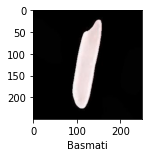

In [ ]:
showImage(X_test, y_test, 200)

In [ ]:
# Normalisasi
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Model CNN
cnn = models.Sequential([
        # cnn
        layers.Conv2D(filters=5, kernel_size=(3,3), activation='relu', input_shape=(250,250,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=7, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        # dense
        layers.Flatten(),
        layers.Dense(10, activation='relu'),
        layers.Dense(5, activation='softmax')
])

In [ ]:
# Summary CNN Model
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 5)       140       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 5)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 7)       322       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 7)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 26047)             0         
                                                                 
 dense (Dense)               (None, 10)                2

In [ ]:
# Configure CNN Model
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'],
            )

In [ ]:
# Training CNN Model
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 104s 823ms/step - loss: 0.3669 - accuracy: 0.8645
Epoch 2/5
125/125 [==============================] - 101s 805ms/step - loss: 0.0530 - accuracy: 0.9825
Epoch 3/5
125/125 [==============================] - 105s 837ms/step - loss: 0.0446 - accuracy: 0.9835
Epoch 4/5
125/125 [==============================] - 102s 814ms/step - loss: 0.0301 - accuracy: 0.9893
Epoch 5/5
125/125 [==============================] - 100s 797ms/step - loss: 0.0227 - accuracy: 0.9915


In [ ]:
# Karena predic isinya adalah array per kelas, seperti [0.1, 0.2, 0.6, 0.8, 0.3], 
# yang diambil adalah index yang memiliki value yang paling besar karena keluaran dari softmax
y_test_predict = cnn.predict(X_test) # Proses prediksi yang menghasilkan 5 nilai dalam array
y_test_predict = [np.argmax(element) for element in y_test_predict] # Mencari value terbesar dan menyimpan indexnya

In [ ]:
# Mendapatkan Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_predict)

In [ ]:
def showPlotCM(cm):
  # Show Confusion Matrix
  fig, ax = plt.subplots(figsize=(3, 3), constrained_layout="True")
  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')        
  plt.xlabel('Predictions', fontsize=12)
  plt.ylabel('Actuals', fontsize=12)
  plt.title('Confusion Matrix', fontsize=12)
  plt.show()

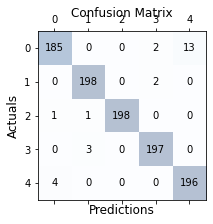

In [ ]:
showPlotCM(cm)